# Music Genre Classification with PCA

### Problem Statement

What music genre is most popular?

### Objectives
- Classify music based on their genre.
- Predict the genre of unlabeled tracks.

### Project Files
The dataset used in this project is provided by 365 Data Science together with a guided instruction to complete the project.

**Music Data Legend.xslx** - This file contains the definition of each the music tracks' characteristics such as rhythym, duration, etc used in the dataset.
**music_dataset_mod.csv** -  This file contains the dataset to be investigated. It consists of 1000 music tracks with distinct characteristics/attributes that classify them into different genres.

In [379]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### I. Load and explore data

In [169]:
df = pd.read_csv("music_dataset_mod.csv")

df

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [173]:
# Discover the different types of Genre
df["Genre"].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

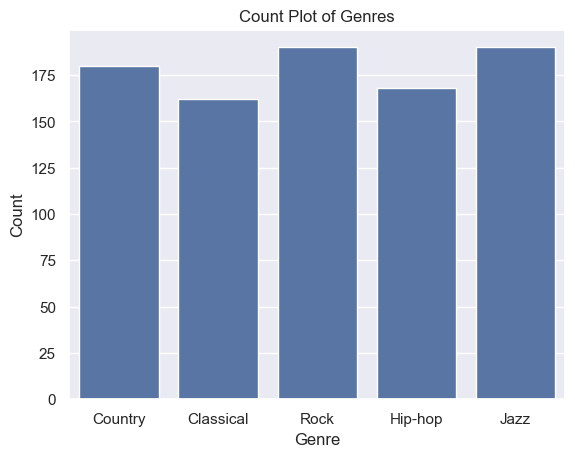

In [175]:
# Visualise genres
sns.countplot(x = "Genre", data = df)

plt.title("Count Plot of Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

**Note:** An ideal distribution for model training will have bars of roughly equal height—indicating that each genre is equally represented.

From the plot above, we can see that the bars are not equal in height highlighted by the differences in height. Rock and Jazz has the most counts while Classical has the lowest. Jazz and Rock genres may be more popular because of the use of instruments such as guitars, drums, etc. and showcases solo instrument moments and spontaneity, which is trending in this age. While classical genre may be less popular as it focuses on orchestration and harmony and more likely produced during the older times. 

### II. Clean data

In [182]:
# drop null values
df_cleaned = df.dropna(subset = ["Genre"])
df_cleaned = df_cleaned.copy() # ensures df is not a slice, but a COPY

### III. Split data into features and target



In [188]:
# Splitting features (X) and target (y)

X = df_cleaned.drop(columns = ["Genre"])
y = df_cleaned["Genre"]

### IV. Encode data

In [198]:
# Use LabelEncoder() followed by fit_transform() to convert categorical to numerical categories

encoder = LabelEncoder()
df_cleaned["Genre"] = encoder.fit_transform(y)
df_encoded = df_cleaned

y = df_encoded["Genre"]

### V. Correlation analysis

In [255]:
correlation_matrix = df_encoded.corr()
print(correlation_matrix["Genre"].sort_values(ascending = False))

Genre                          1.000000
Distorted Guitar               0.607291
Metal Frequencies              0.582498
Electronic Element Presence    0.232907
Drums Influence                0.169501
Percussion Strength            0.146171
Tempo                          0.113906
Rhythm Complexity              0.095718
Ambient Sound Influence        0.014561
Vocal Presence                -0.005501
Instrumental Overlaps         -0.071734
String Instrument Detection   -0.185088
Dynamics Range                -0.462600
Name: Genre, dtype: float64


<Axes: >

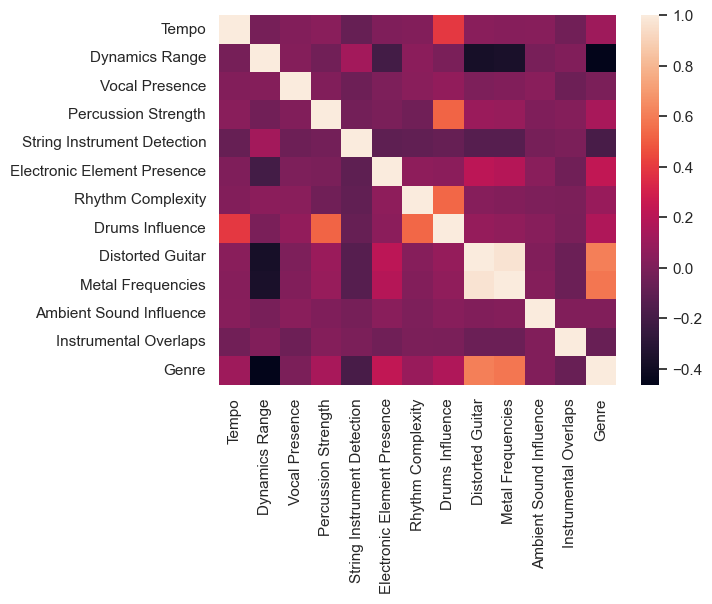

In [259]:
sns.heatmap(correlation_matrix)

#### Interpretation

From the correlation matrix and heatmap, we can see that the following attributes show moderately positive correlation with a music track's genre: Distorted Guitar (0.61) and Metal Frequencies (0.58), while Dynamics Range (-0.46) shows a moderately negative correlation. On the other hand, the rest of the attributes shows weak to no correlation with the music's genre.

As Distorted Guitar and Metal Frequencies are strong predictors of genre, this supports that genres Jazz and Rock are the more popular ones because of the emphasis on solo instrument moments and spontaneity.

### VI. PCA for Dimensionality Reduction in Features

Explained Variance Ratio: [0.22751256 0.13929128 0.08651157 0.08030889 0.07880914 0.07554367
 0.07338499 0.07027911 0.06461869 0.05659874 0.03296678 0.01162425
 0.00255033]
Cumulative Variance: [0.22751256 0.36680384 0.4533154  0.5336243  0.61243344 0.68797711
 0.76136209 0.83164121 0.8962599  0.95285864 0.98582542 0.99744967
 1.        ]


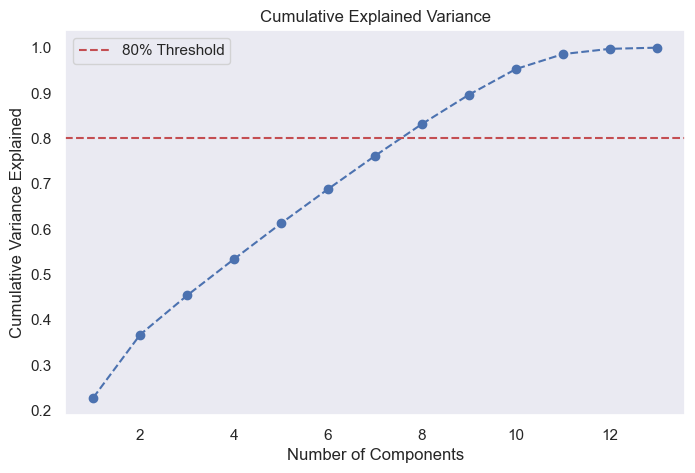

In [284]:
# Note: Principal Components are new variables created by PCA that summarises data from original dataset into fewer dimensions 
# but still preserving the original data's information

# scale data first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# apply pca
pca = PCA()
df_transformed = pca.fit_transform(df_scaled)

# analyse variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Variance:", cumulative_variance)

# visualise (from chatgpt)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid()
plt.show()


#### Interpretation

**Note:** Ideal is you count the number of components until it reaches the 80% mark (this means these components explains 80% or what is needed to retain information from dataset with fewer dimensionality). But in the case wherein the curve flattens ("elbow curve") before it reaches the 80% mark, lessen the number of components upto before it started to flatten, sacrificing variance for simplicity which would benefit the model better.

In this case, the curve continues to rise past the 80% mark and starts to flatten at approx. 11 components. The last number of components before it reaches the mark is 7 components, indicating that the minimum number of components wherein the original data's information ca be preserved is at 7 components.


#### Decide on Number of Components (n_components)
From the PCA plot, we can conclude that ideal number of components for the model is 7.

#### Reapply PCA

In [336]:
pca = PCA(n_components = 7)
df_transformed = pca.fit_transform(df_scaled)
X_pca = pca.fit_transform(X)

# Note: pca is only applied to features because target is already simplified as it is usually one variable, while features can be a lot.

### VII. Evaluating Classification Efficacy – PCA Transformed vs. Original Data

#### Split test and train data

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 42)

#### Train data

In [349]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Evaluate model using accuracy score and classification report

In [356]:
y_pred = model.predict(X_test)
y_pred

array([4, 3, 0, 0, 0, 3, 3, 4, 1, 3, 4, 2, 2, 3, 0, 0, 0, 0, 1, 1, 0, 4,
       0, 0, 3, 3, 2, 0, 1, 1, 1, 0, 1, 4, 4, 4, 4, 4, 2, 3, 3, 3, 2, 4,
       0, 0, 4, 4, 0, 2, 0, 4, 0, 2, 1, 2, 3, 3, 2, 3, 2, 0, 2, 2, 3, 4,
       0, 4, 4, 4, 2, 4, 4, 1, 2, 3, 2, 1, 0, 4, 2, 4, 0, 4, 0, 2, 1, 2,
       3, 0, 3, 4, 3, 1, 0, 4, 4, 4, 3, 0, 2, 3, 2, 1, 4, 2, 2, 1, 4, 3,
       1, 0, 2, 3, 4, 3, 2, 2, 3, 2, 3, 0, 2, 0, 4, 4, 2, 0, 4, 2, 3, 3,
       1, 0, 0, 4, 0, 4, 0, 1, 2, 0, 0, 3, 2, 0, 0, 0, 3, 0, 4, 4, 3, 1,
       1, 4, 0, 2, 1, 1, 4, 4, 3, 1, 4, 4, 2, 0, 4, 4, 3, 0, 3, 4, 0, 3,
       0, 0, 0, 1, 3, 4, 1, 3, 3, 2, 2, 4, 4, 3, 4, 0, 4, 4, 4, 4, 0, 2,
       3, 2, 4, 2, 0, 4, 0, 0, 0, 0, 3, 3, 3, 2, 2, 2, 3, 1, 4, 1, 4, 0,
       4, 0, 4, 2, 0, 3, 4, 4, 4, 2, 3, 4, 4, 3, 0, 1, 3, 4, 4, 4, 1, 0,
       3, 0, 2, 4, 4, 3, 2, 3, 4, 3, 3, 0, 4, 3, 0, 4, 3, 4, 4, 2, 1, 0,
       2, 2, 3])

In [385]:
accuracy = accuracy_score(y_pred, y_test)

print("Accuracy: ", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.5056179775280899

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.88        51
           1       0.34      0.19      0.25        52
           2       0.46      0.46      0.46        48
           3       0.40      0.35      0.38        62
           4       0.42      0.57      0.49        54

    accuracy                           0.51       267
   macro avg       0.49      0.51      0.49       267
weighted avg       0.48      0.51      0.49       267



#### Repeat process for original data

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)

print("Accuracy: ", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.5318352059925093

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92        51
           1       0.34      0.27      0.30        52
           2       0.44      0.46      0.45        48
           3       0.44      0.39      0.41        62
           4       0.50      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267

